In [1]:
# common
import sys
import os
import os.path as op

# basic
import numpy as np
import pandas as pd
import xarray as xr
from scipy.io import loadmat
from time import time

# custom
# calval wrap module
from lib import calval
# functions
from lib import functions

In [2]:
# initial time to see the duration of the notebook
t0 = time()

In [3]:
# data 
p_data = op.join(os.getcwd(), 'data')

buoy       =  pd.read_pickle(op.join(p_data, 'Bilbao-Vizcaya Ext.pkl'))
csiro      =  pd.read_pickle(op.join(p_data, 'csiro_dataframe.pkl'))
satellite  =  xr.open_dataset(op.join(p_data, 'satellite_dataset.nc'))
bat_spain  =  np.loadtxt(op.join(p_data, 'SPAIN_2020_bath.dat'))
bat_gebco  =  xr.open_dataset(op.join(p_data, 'GEBCO_2019_bath.nc'))

print('---------------------------------------------------')
print('Time wasted reading the data: ' + str(round(time()-t0, 2)) + ' s')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted reading the data: 12.42 s
---------------------------------------------------


In [4]:
t1 = time()

Initializing data to calibrate... 
 
Satellite box values: 
South latitude: 43.8
North latitude: 44.2
West latitude: 356.2
East latitude: 356.6
 
 
Selecting the satellite data choosed... 
 
Satellite length: 8925 
 
Hindcast information able to calibrate: 301679 
 
Choose the way to calibrate the data: 
True: hindcast for each satellite 
False: satellite for each hindcast 
----- Select ----- : False
 
 
Performing the time calibration... 
 
Length of data to calibrate: 4210 
 
 
 
--------------------------------------------------------
SATELLITE CALIBRATION
-------------------------------------------------------- 
 
Constructing matrices and calibrating... 
 
Value to set the umbral for not enough data to calibrate, 
this value can be set to 0.01, 0.02 or 0.03: 
----- Threshold ----- : 0.01
 
 
 
 
Params used for the SATELLITE calibration are: 
 
[1.21858244 1.13665817 0.90206734 1.03003698 1.0842643  1.
 0.93985562 1.28483961 1.51432808 1.         1.         1.
 0.99378739 1.020966

/home/tausiaj/Documentos/Olas/Calibration-Validation/CalValWaves/lib/calval.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ['Hs_'+self.hind+'_cal'] = Hs_corr
/home/tausiaj/Documentos/Olas/Calibration-Validation/CalValWaves/lib/calval.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ['Hs_'+self.hind] = Hs_corr


 
   
 
 
 
--------------------------------------------------------
BUOY CALIBRATION
-------------------------------------------------------- 
 
Constructing matrices and calibrating... 
 
Value to set the umbral for not enough data to calibrate, 
this value can be set to 0.01, 0.02 or 0.03: 
----- Threshold ----- : 0.01
 
 
 
 
Params used for the BUOY calibration are: 
 
[1.02137022 0.96863021 0.86212164 0.8258302  0.68153792 0.54535093
 0.6200418  1.         1.         1.         1.         1.
 0.89601481 1.00653646 1.05089847 1.05307368 1.05729298 1.09789492
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.95365576 1.02998954
 1.1126027  1.17649791]
 
 
Plotting just the data used to calibrate... 
 
Saving corrected results... 
 


/home/tausiaj/Documentos/Olas/Calibration-Validation/CalValWaves/lib/calval.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ['Hs_'+self.hind+'_cal'] = Hs_corr
/home/tausiaj/Documentos/Olas/Calibration-Validation/CalValWaves/lib/calval.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ['Hs_'+self.hind] = Hs_corr


 
   
 
---------------------------------------------------
Time wasted initializing the constructor: 21.12 m
---------------------------------------------------


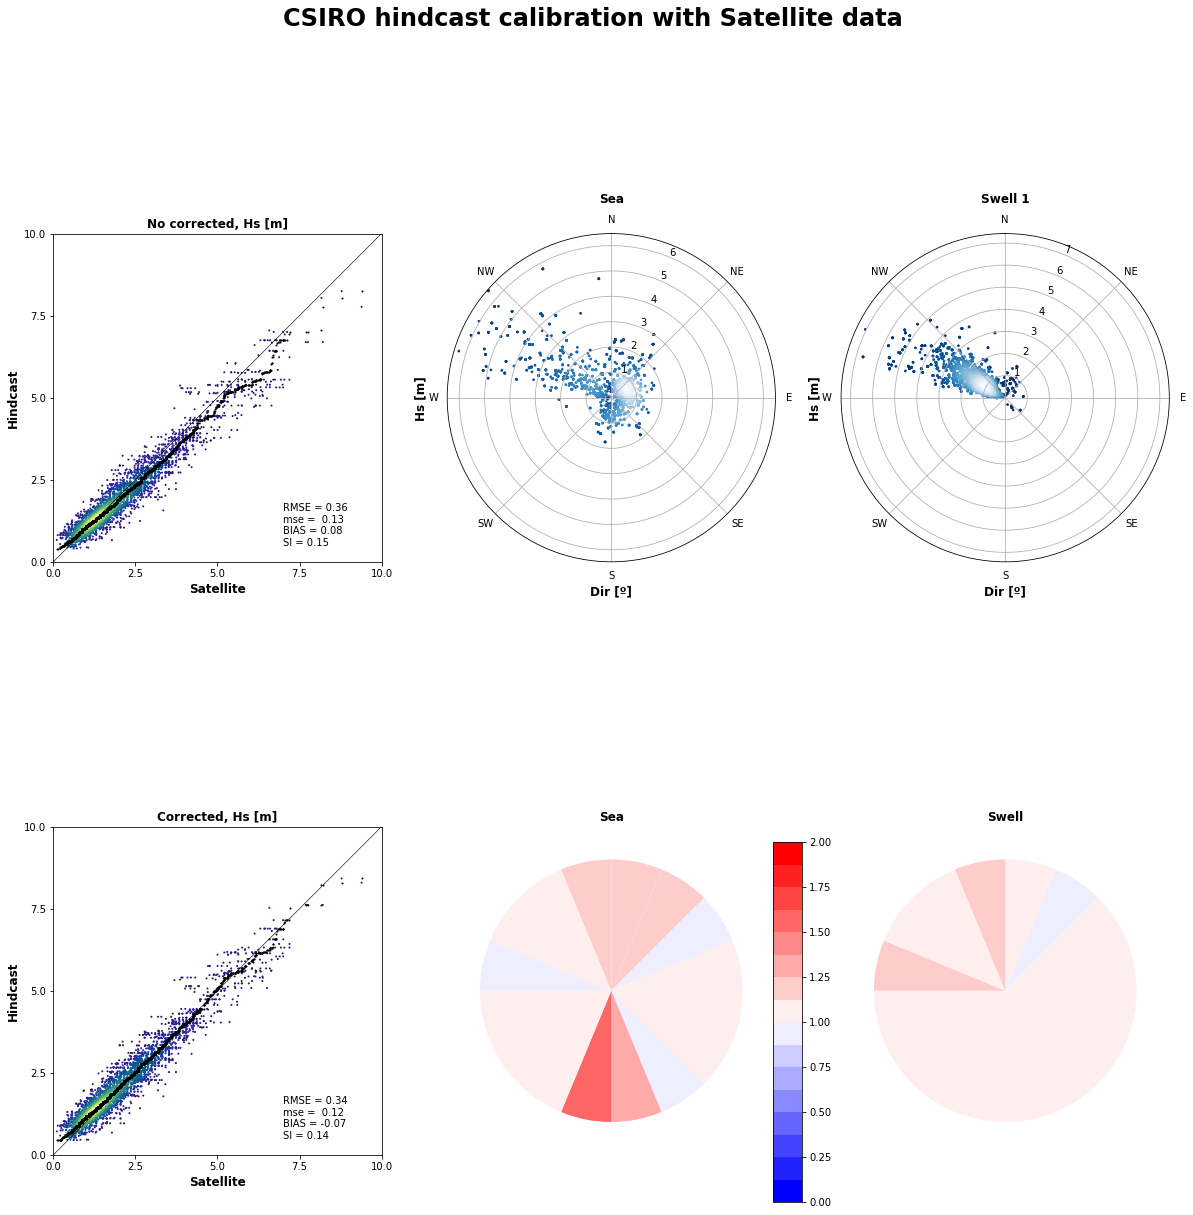

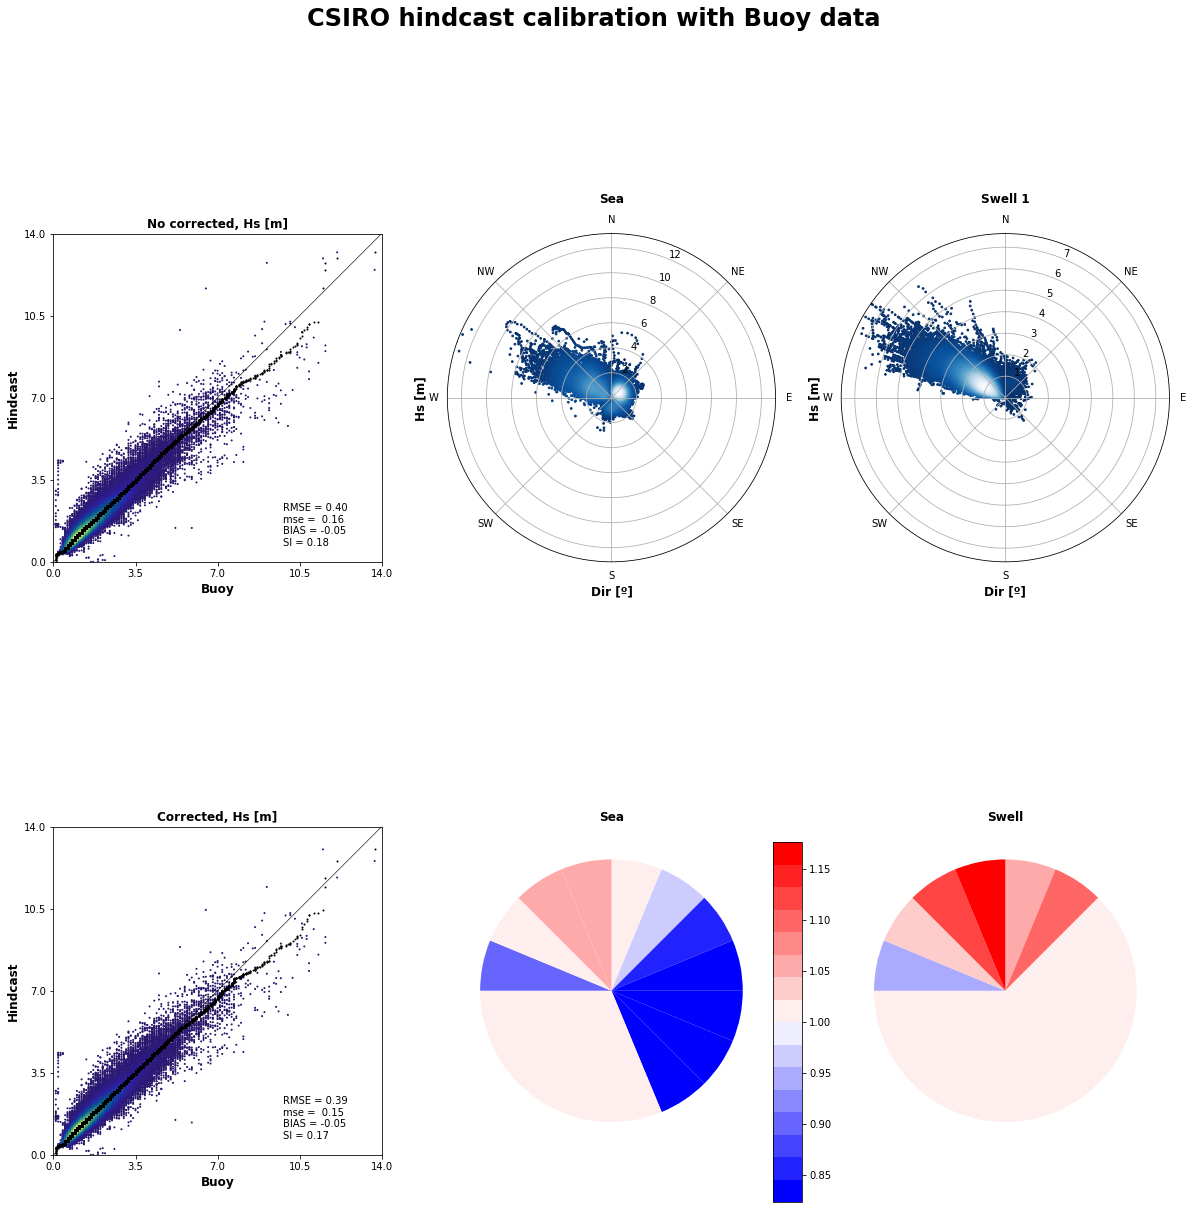

In [5]:
# creation of the main object

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Satellite box :    South = 43.8               ###
###                      North = 44.2               ###
###                      West  = 356.2              ###
###                      East  = 356.6              ###
###   Time calibration:  False                      ###
###   Threshold :        0.01                       ###
#######################################################

# the Threshold allows us to delete not relevant information

calval_case = calval.CalVal(buoy, csiro, satellite, 'CSIRO', bat_spain, bat_gebco)

print('---------------------------------------------------')
print('Time wasted initializing the constructor: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

In [6]:
t1 = time()

--------------------------------------------------------
RAW comparison will be performed
-------------------------------------------------------- 
 
Number of years: 2
Years separated by one space: 2006 2007
 
 
Comparing data... 
 


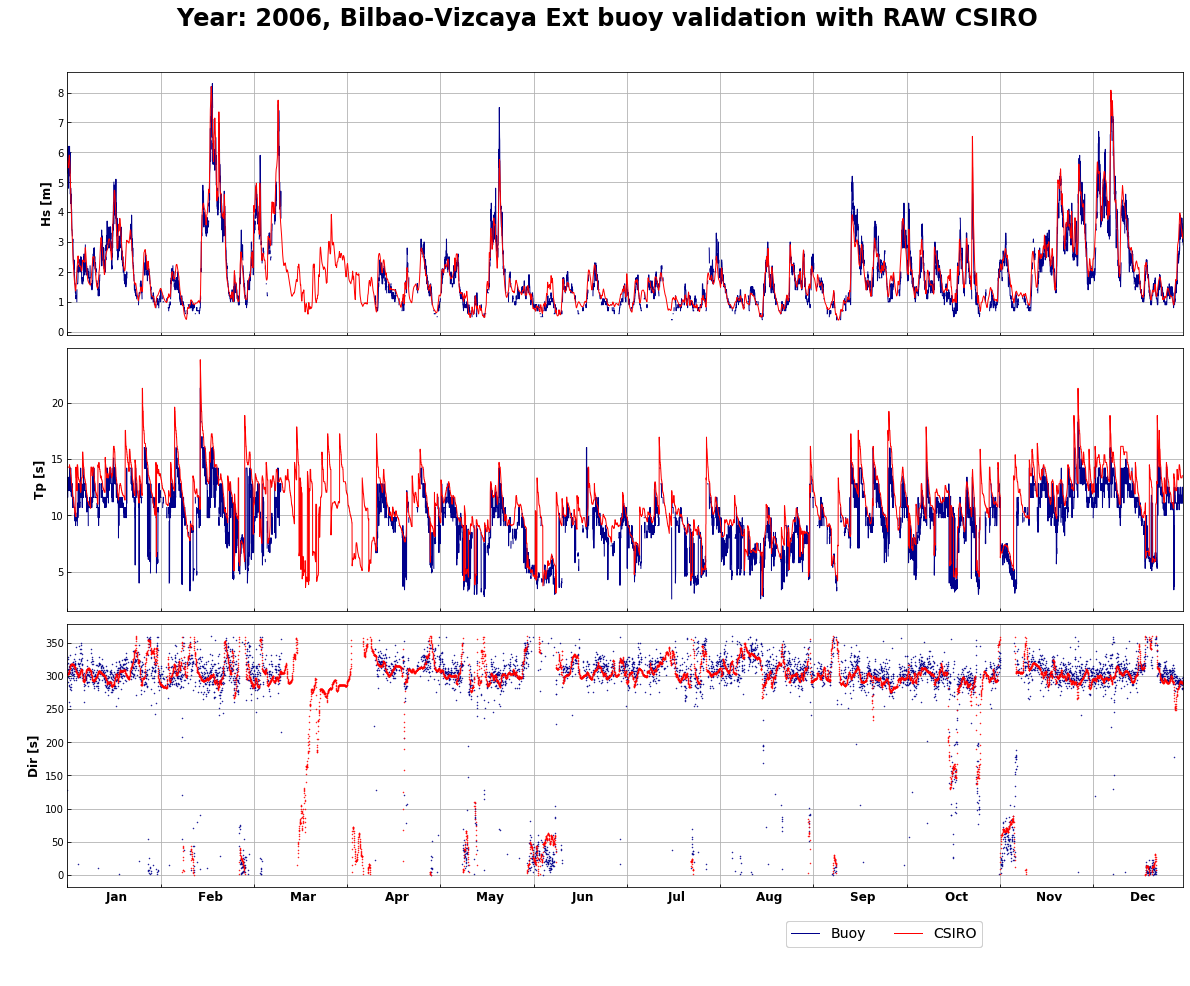

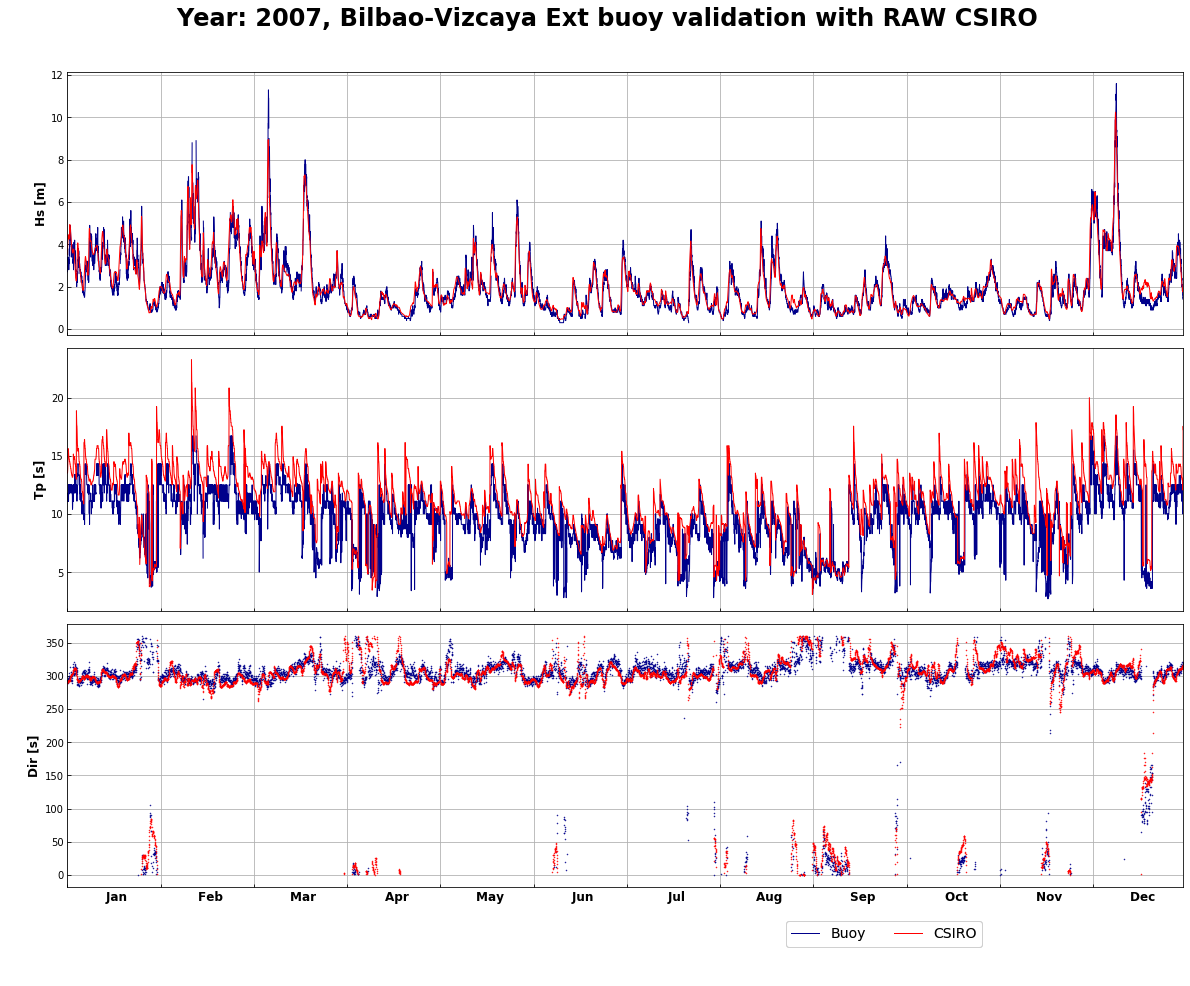

In [7]:
# comparisons

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Number of years :    2                        ###
###   Years :              2006 2007                ###
#######################################################

calval_case.buoy_comparison('raw')

--------------------------------------------------------
SAT_CORR comparison will be performed
-------------------------------------------------------- 
 
Number of years: 2
Years separated by one space: 2006 2007
 
 
Comparing data... 
 


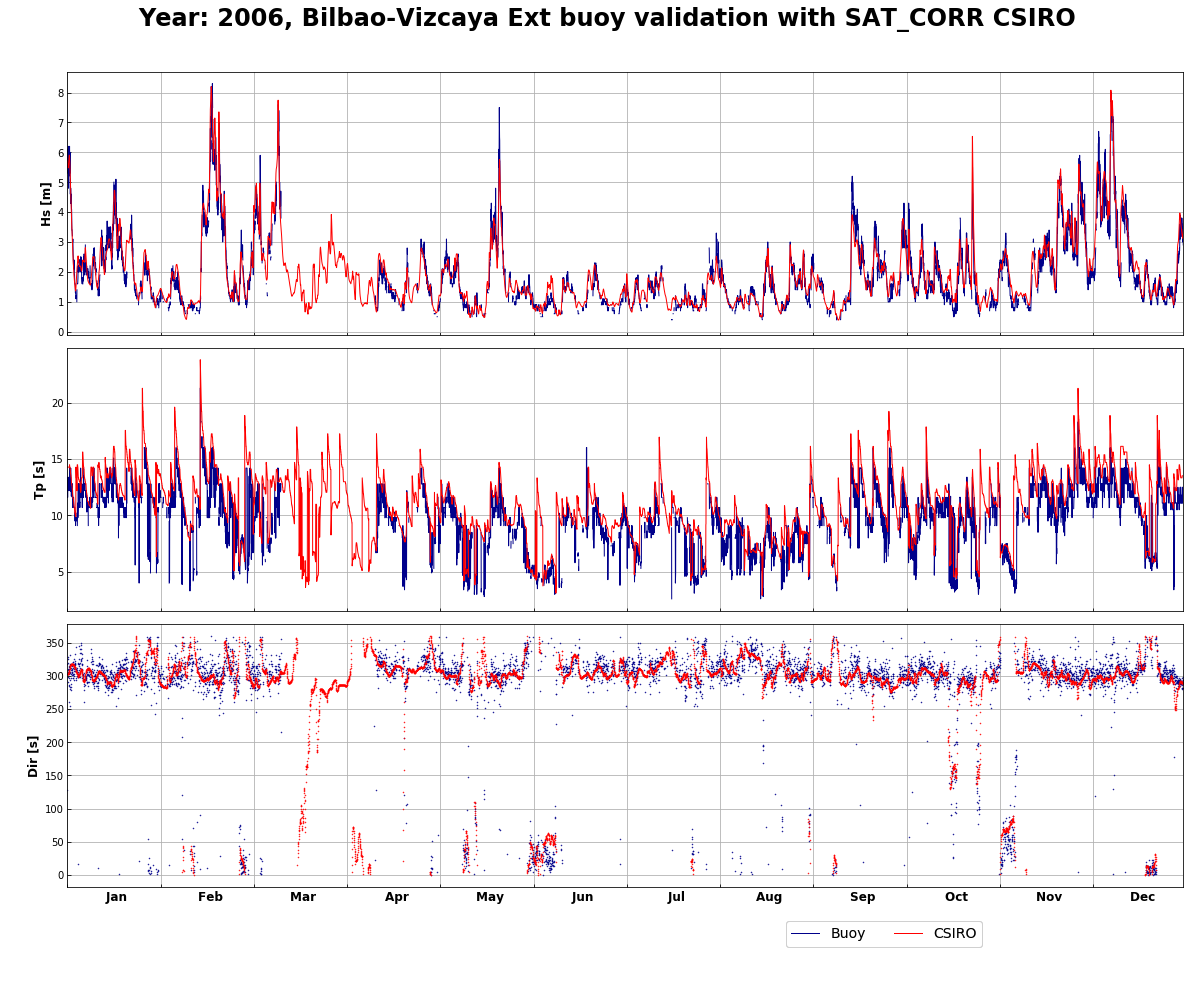

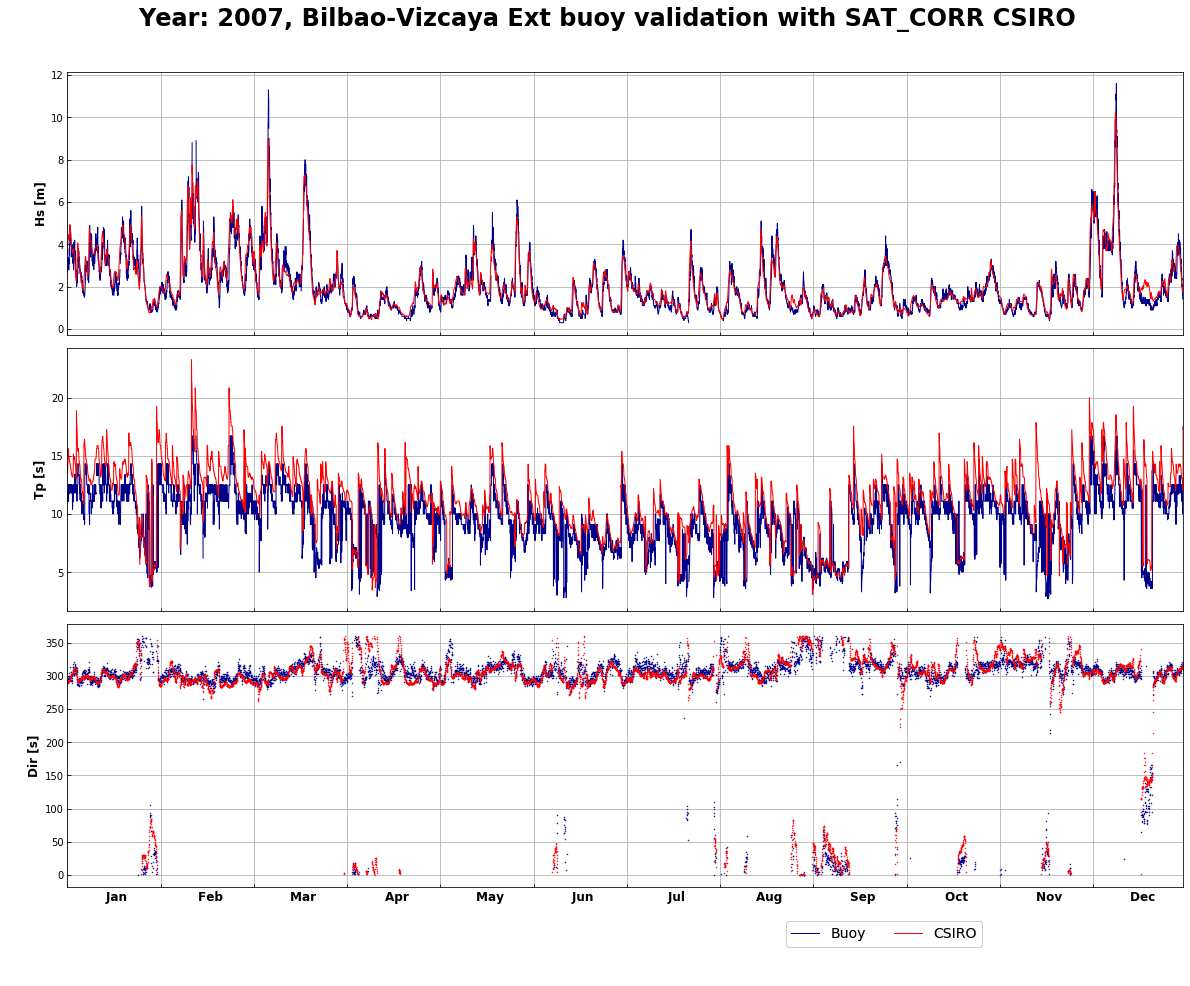

In [8]:
calval_case.buoy_comparison('sat_corr')

--------------------------------------------------------
BUOY_CORR comparison will be performed
-------------------------------------------------------- 
 
Number of years: 2
Years separated by one space: 2006
 
 
Comparing data... 
 


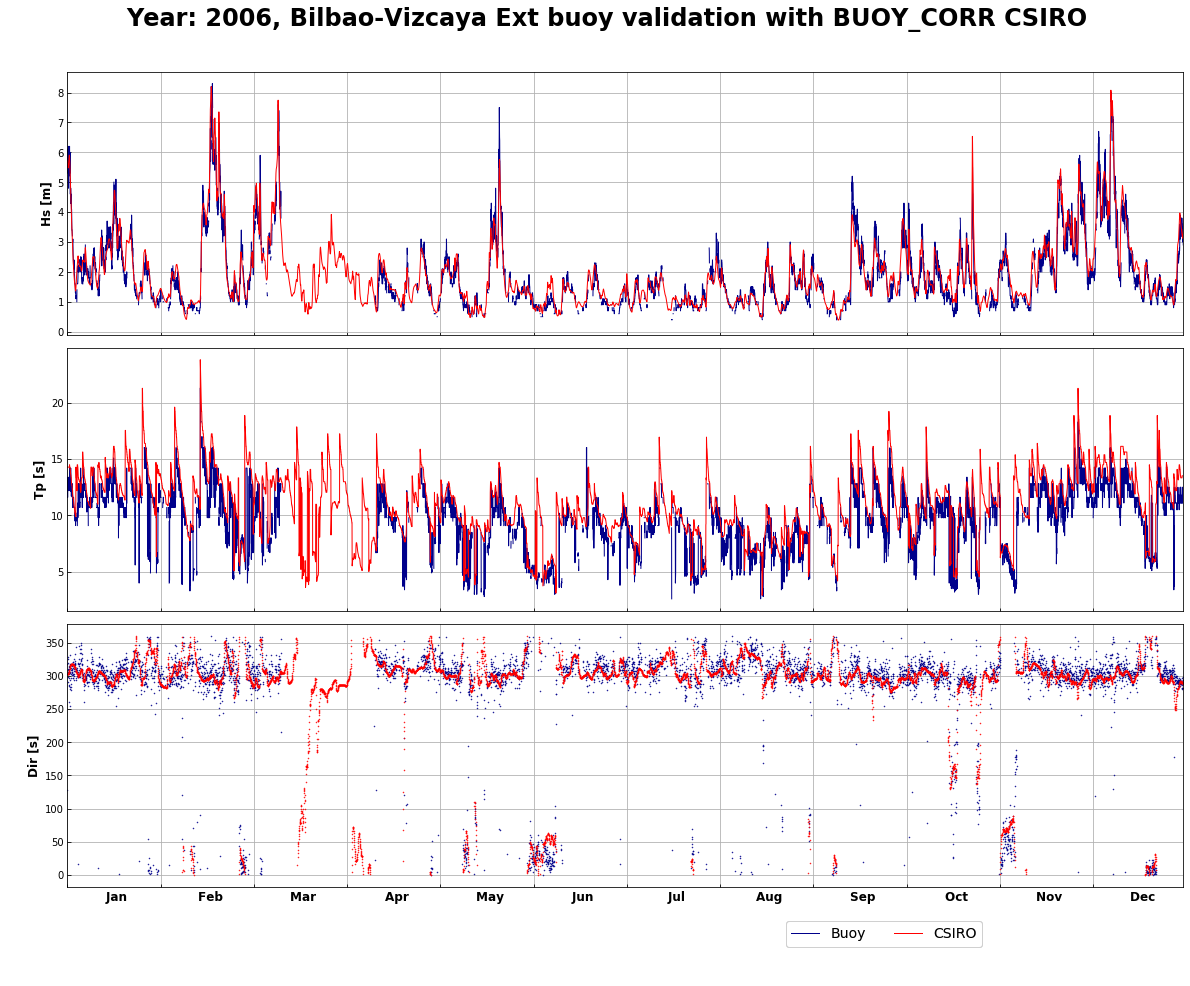

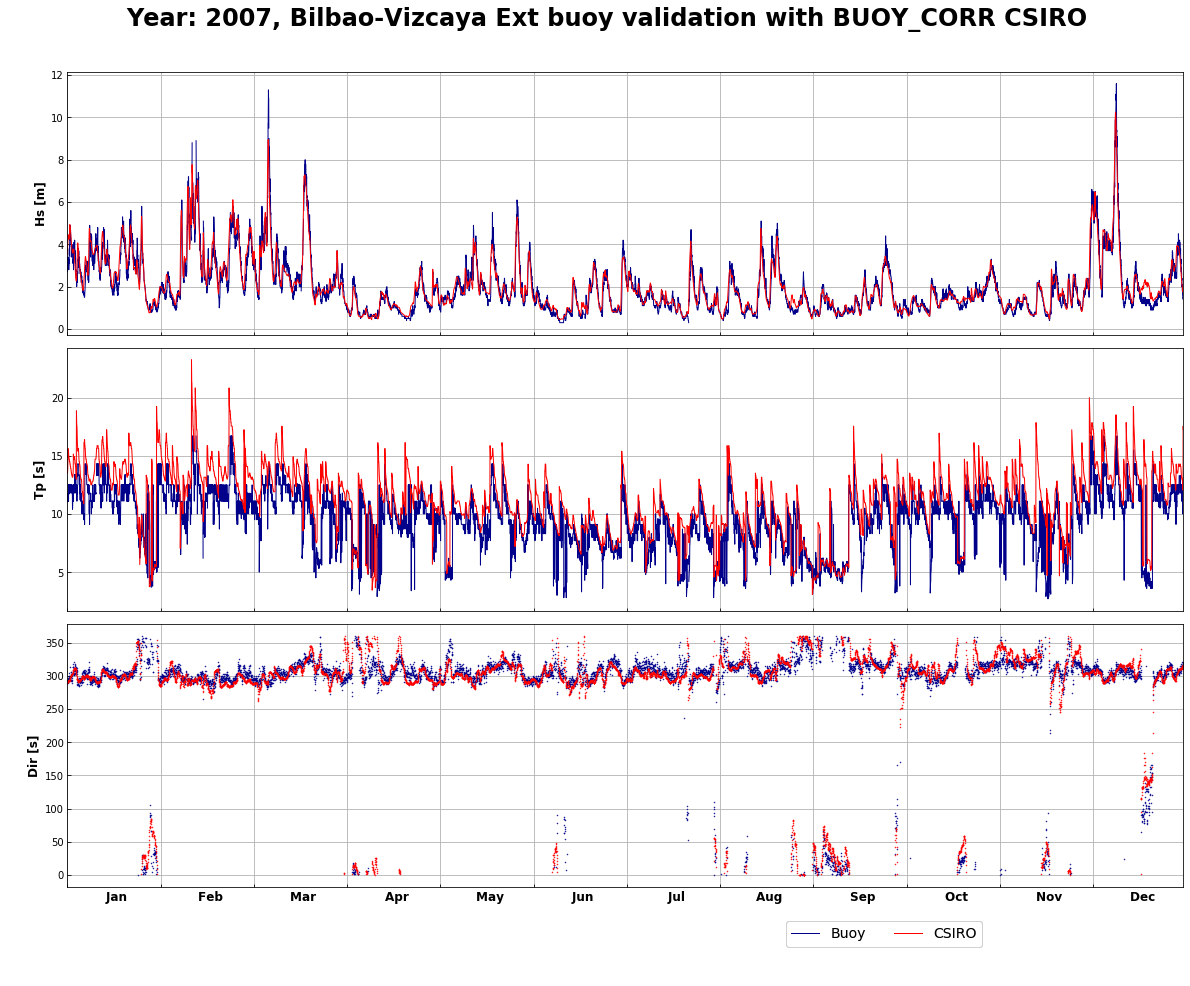

In [9]:
calval_case.buoy_comparison('buoy_corr')

In [10]:
print('---------------------------------------------------')
print('Time wasted comparing: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted comparing: 3.3 m
---------------------------------------------------


In [11]:
t1 = time()

--------------------------------------------------------
RAW validation will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 59119 
 


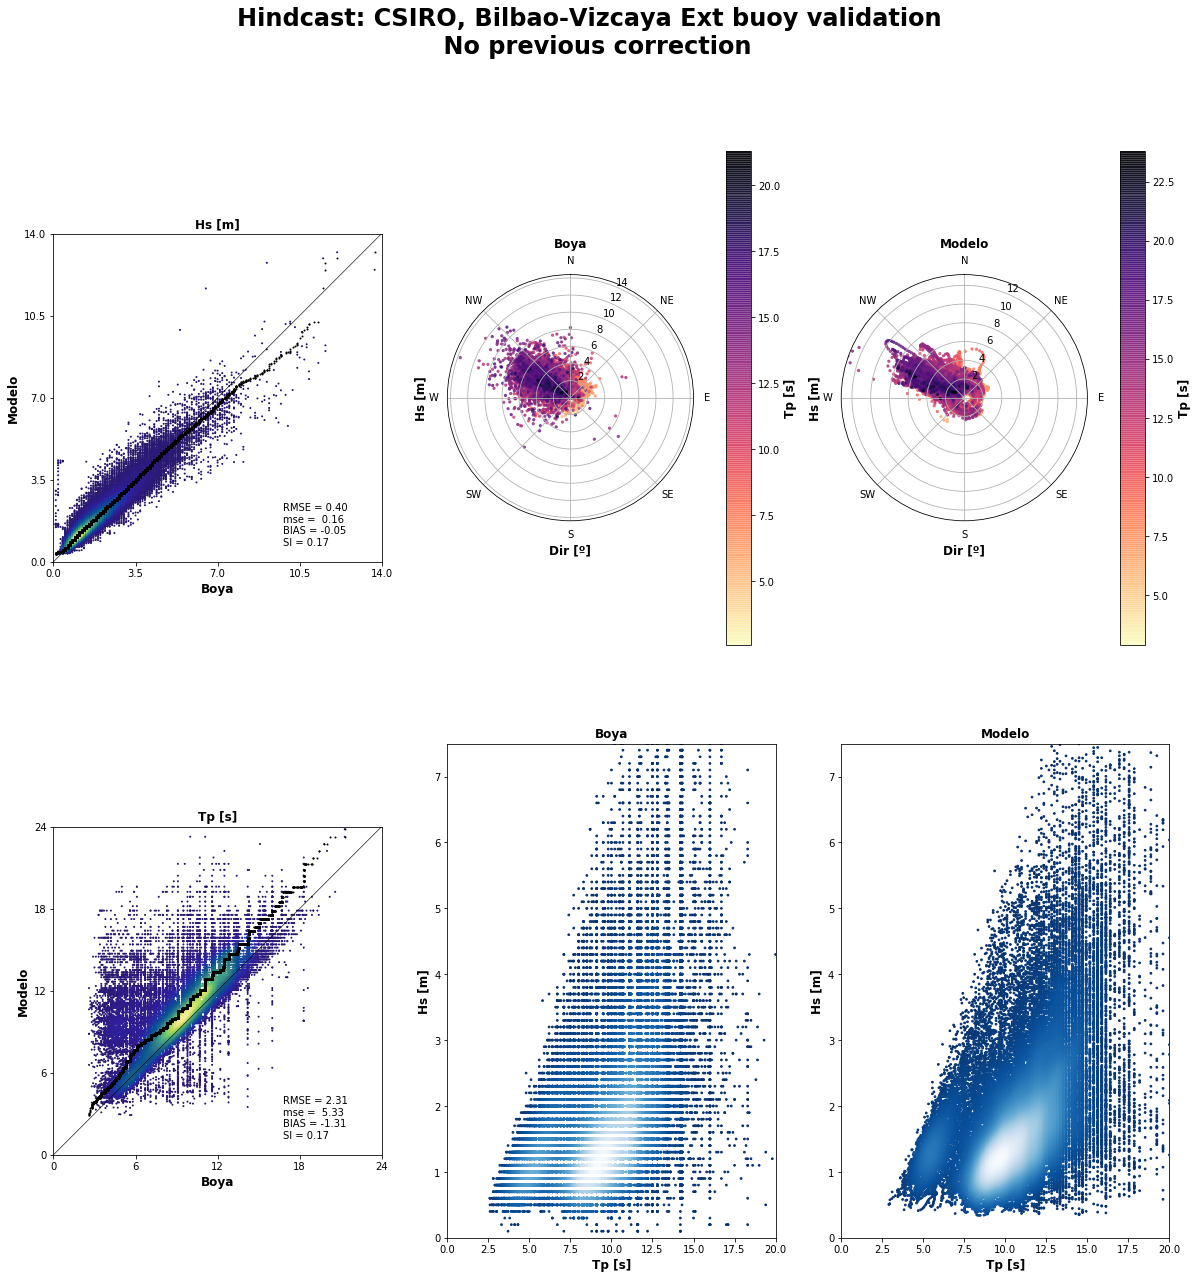

In [12]:
# validations

calval_case.buoy_validation('raw')

--------------------------------------------------------
SAT_CORR validation will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 59119 
 


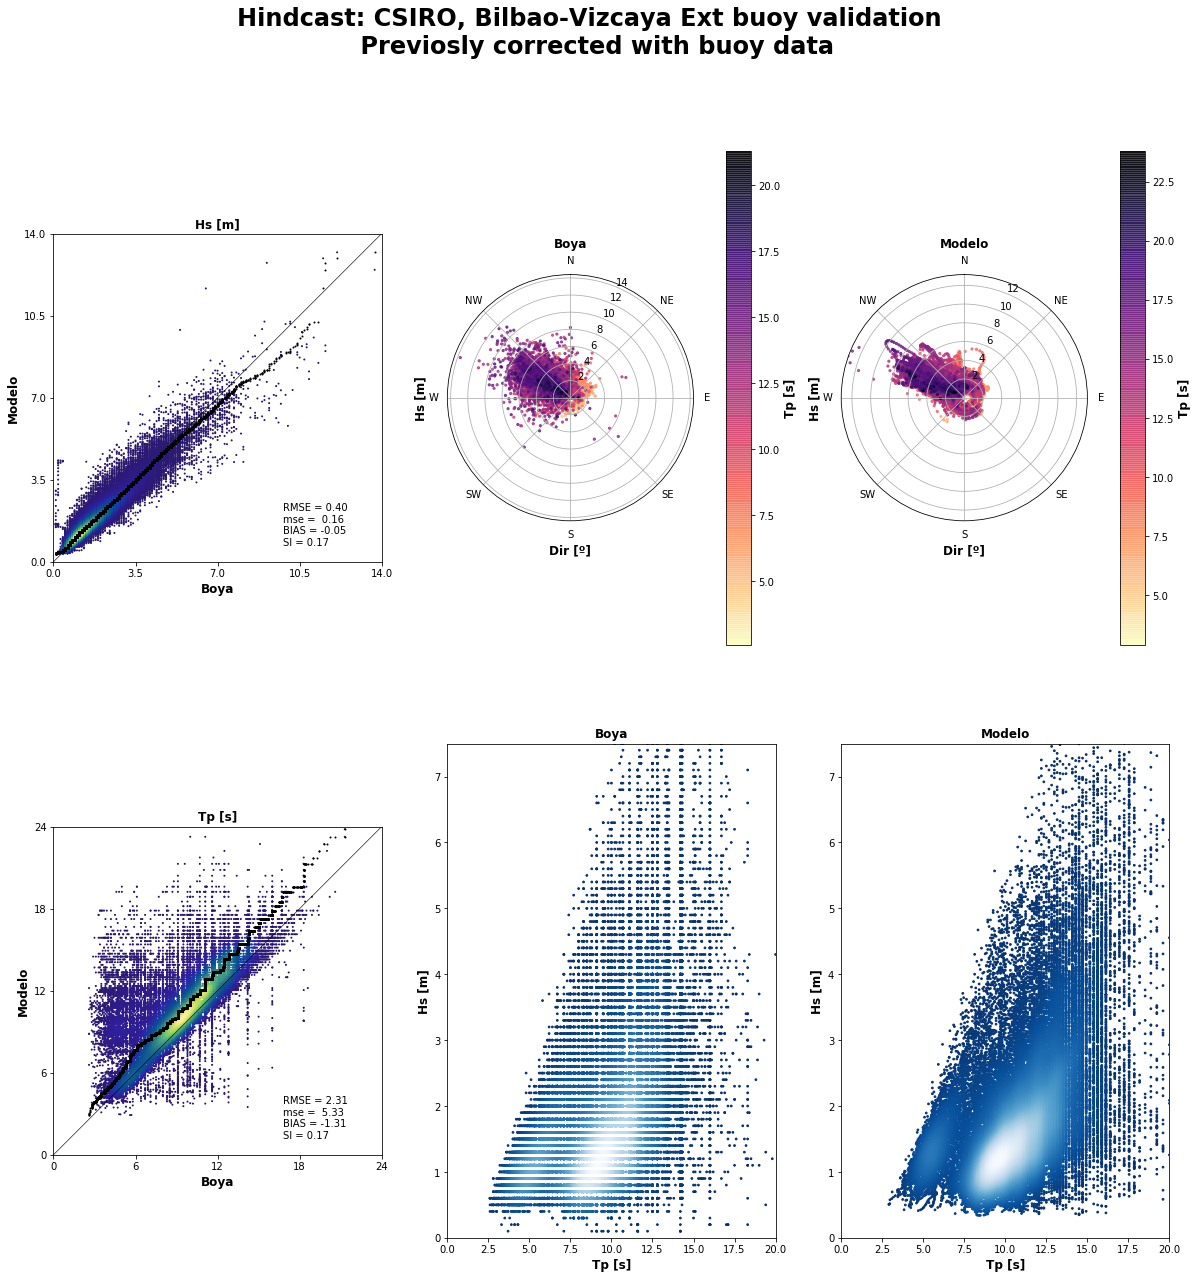

In [13]:
calval_case.buoy_validation('sat_corr')

--------------------------------------------------------
BUOY_CORR validation will be performed
-------------------------------------------------------- 
 
Validating and plotting validated data... 
 
Length of data to validate: 59119 
 


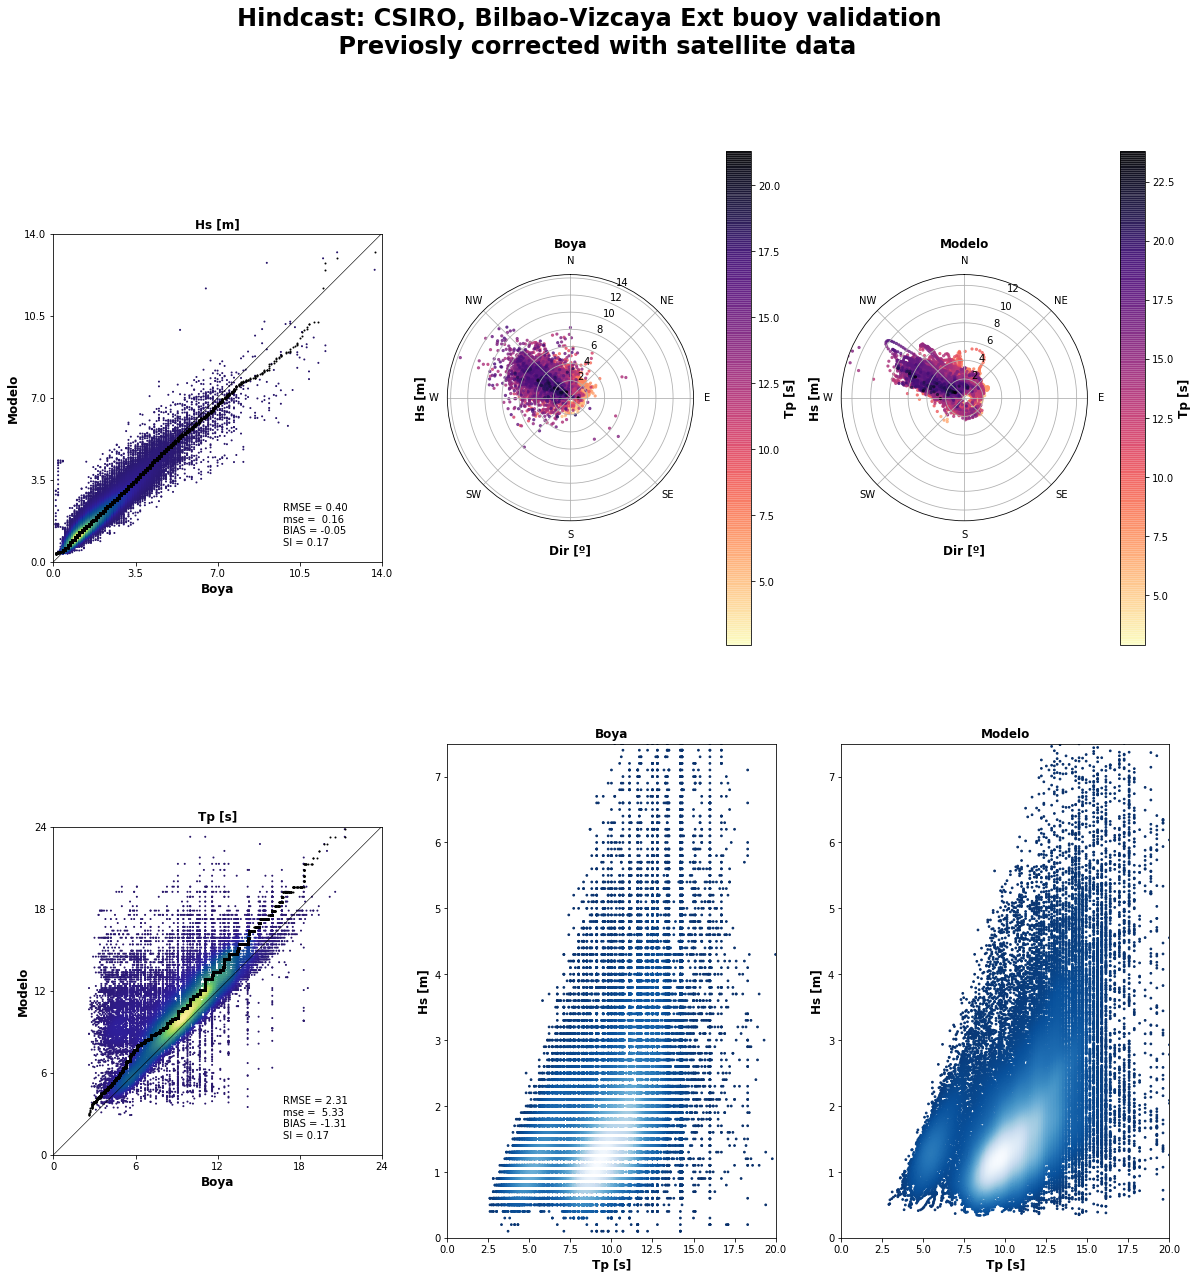

In [14]:
calval_case.buoy_validation('buoy_corr')

In [15]:
print('---------------------------------------------------')
print('Time wasted comparing: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted comparing: 18.04 m
---------------------------------------------------


In [16]:
t1 = time()

 

MAP BOUNDARYS: 
--------------------------------------------------------
South latitude: 43.0
North latitude: 44.4
West latitude: -4.6
East latitude: -2.4
Grid step resolution for the meridians: 0.2
Maximum value for the bathymetry (+): 250
-------------------------------------------------------- 
 
Plotting gebco bathymetry... 
 
Plotting granulated bathymetry for near coast... 
 
La batimetría llega hasta: -249.0


/home/tausiaj/Documentos/Olas/Calibration-Validation/CalValWaves/lib/calval.py:683: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  resolution='f')


Coordinates for the hindcast: 
Longitude for the hindcast point: -3.6
Latitude for the hindcast point: 44.0


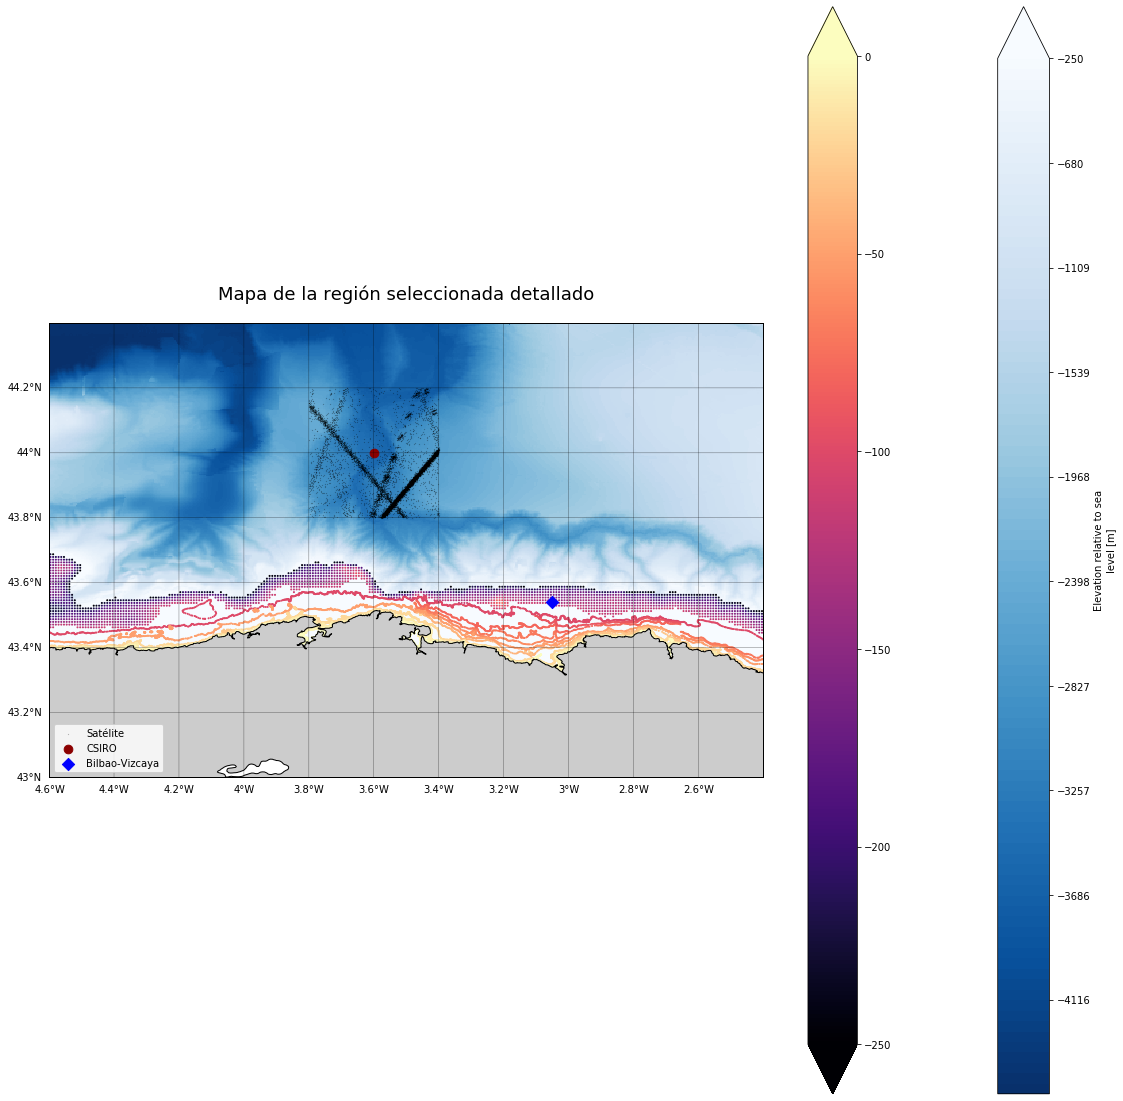

In [17]:
# map

#######################################################
###   VALUES WILL HAVE TO BE INSERTED SO BE READY   ###
###   Map box :          South = 43.0               ###
###                      North = 44.4               ###
###                      West  = -4.6               ###
###                      East  = -2.4               ###
###   Map parameters :   grid_step = 0.2            ###
###                      depth = 250                ###
###   Hindcast box :     Longitude = -3.6           ###
###                      Latitude = 44.0            ###
#######################################################

calval_case.region_map()

In [18]:
print('---------------------------------------------------')
print('Time wasted plotting the map: ' + str(round((time()-t1)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
Time wasted plotting the map: 1.7 m
---------------------------------------------------


In [21]:
print('---------------------------------------------------')
print('TOTAL time of the script: ' + str(round((time()-t0)/60, 2)) + ' m')
print('---------------------------------------------------')

---------------------------------------------------
TOTAL time of the script: 45.55 m
---------------------------------------------------
